In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
from tensorflow.keras.applications.resnet import ResNet101
from tensorflow.keras.utils import load_img, img_to_array
from keras.layers import GlobalAveragePooling2D, Dense, Dropout,Activation,Flatten
import numpy as np
import os
import time
import tensorflow as tf

from tensorflow.keras.applications.imagenet_utils import preprocess_input
from keras.layers import Input
from keras.models import Model  
from keras.utils import np_utils
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split

In [3]:
data_path = "/content/drive/MyDrive/Covid_Images"
data_dir_list = os.listdir(data_path)

img_data_list=[]

for dataset in data_dir_list:
	img_list=os.listdir(data_path+'/'+ dataset)
	print ('Loaded the images of dataset-'+'{}\n'.format(dataset))
	for img in img_list:
		img_path = data_path + '/'+ dataset + '/'+ img 
		img = load_img(img_path, target_size=(224, 224))
		x = img_to_array(img)
		x = np.expand_dims(x, axis=0)
		x = preprocess_input(x)
		#print('Input image shape:', x.shape)
		img_data_list.append(x)

Loaded the images of dataset-Non-Covid

Loaded the images of dataset-Covid



In [4]:
img_data = np.array(img_data_list)
#img_data = img_data.astype('float32')
print (img_data.shape)
img_data=np.rollaxis(img_data,1,0)
print (img_data.shape)
img_data=img_data[0]
print (img_data.shape)

(2491, 1, 224, 224, 3)
(1, 2491, 224, 224, 3)
(2491, 224, 224, 3)


In [5]:
# Define the number of classes
num_classes = 2
num_of_samples = img_data.shape[0]
labels = np.ones((num_of_samples,),dtype='int64')

labels[0:1253]=0
labels[1253:]=1

names = ['COVID','NON-COVID']
# convert class labels to on-hot encoding
Y = np_utils.to_categorical(labels, num_classes)

In [6]:
#Shuffle the dataset
x,y = shuffle(img_data,Y, random_state=2)
# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(x, y, test_size=0.2, random_state=2)


In [7]:
# Fine tune the resnet 101
image_input = Input(shape=(224, 224, 3))
# image_input
model = ResNet101(weights='imagenet',include_top=False, input_tensor = image_input)
model.summary()

171446536/171446536 [==============================] - 1s 0us/step
Model: "resnet101"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                       

In [8]:
model.trainable = False

last_layer = model.output
# add a global spatial average pooling layer
x = GlobalAveragePooling2D()(last_layer)
# add fully-connected & dropout layers7
x = Dense(512, activation='relu',name='fc-1')(x)
x = Dropout(0.5)(x)
x = Dense(256, activation='relu',name='fc-2')(x)
x = Dropout(0.5)(x)
x = Dense(120, activation='relu',name='fc-3')(x)
x = Dropout(0.5)(x)
# a softmax layer for 2 classes
out = Dense(num_classes, activation='softmax',name='output_layer')(x)


In [9]:
for layer in model.layers:
  print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [10]:
# this is the model we will train
custom_resnet_model2 = Model(inputs=model.input, outputs=out)

custom_resnet_model2.summary()


Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [11]:
for layer in custom_resnet_model2.layers:
   print(layer.trainable)

False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [12]:
t = time.time()
custom_resnet_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=12, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (time.time()-t))

Epoch 1/12
63/63 [==============================] - 30s 243ms/step - loss: 0.8004 - accuracy: 0.6401 - val_loss: 0.4231 - val_accuracy: 0.8377
Epoch 2/12
63/63 [==============================] - 12s 195ms/step - loss: 0.4800 - accuracy: 0.7746 - val_loss: 0.3458 - val_accuracy: 0.8878
Epoch 3/12
63/63 [==============================] - 12s 197ms/step - loss: 0.3848 - accuracy: 0.8404 - val_loss: 0.2804 - val_accuracy: 0.8938
Epoch 4/12
63/63 [==============================] - 12s 199ms/step - loss: 0.3429 - accuracy: 0.8549 - val_loss: 0.3093 - val_accuracy: 0.8617
Epoch 5/12
63/63 [==============================] - 13s 201ms/step - loss: 0.3248 - accuracy: 0.8660 - val_loss: 0.2623 - val_accuracy: 0.8838
Epoch 6/12
63/63 [==============================] - 12s 199ms/step - loss: 0.2922 - accuracy: 0.8855 - val_loss: 0.2407 - val_accuracy: 0.8958
Epoch 7/12
63/63 [==============================] - 12s 198ms/step - loss: 0.2761 - accuracy: 0.8911 - val_loss: 0.2198 - val_accuracy: 0.9158

In [13]:
for layer in custom_resnet_model2.layers[-33:]:
	layer.trainable = True
for layer in custom_resnet_model2.layers:
  print(layer.trainable)


False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
False
Fals

In [14]:
custom_resnet_model2.summary()
custom_resnet_model2.compile(loss='binary_crossentropy',optimizer='adam',metrics=['accuracy'])

Model: "model"
__________________________________________________________________________________________________
 Layer (type)                   Output Shape         Param #     Connected to                     
 input_1 (InputLayer)           [(None, 224, 224, 3  0           []                               
                                )]                                                                
                                                                                                  
 conv1_pad (ZeroPadding2D)      (None, 230, 230, 3)  0           ['input_1[0][0]']                
                                                                                                  
 conv1_conv (Conv2D)            (None, 112, 112, 64  9472        ['conv1_pad[0][0]']              
                                )                                                                 
                                                                                              

In [15]:
t=time.time()
hist = custom_resnet_model2.fit(X_train, y_train, batch_size=32, epochs=20, verbose=1, validation_data=(X_test, y_test))
print('Training time: %s' % (time.time()-t))

Epoch 1/20
63/63 [==============================] - 23s 252ms/step - loss: 0.3621 - accuracy: 0.8815 - val_loss: 3.5376 - val_accuracy: 0.8617
Epoch 2/20
63/63 [==============================] - 14s 220ms/step - loss: 0.1596 - accuracy: 0.9428 - val_loss: 0.8884 - val_accuracy: 0.8758
Epoch 3/20
63/63 [==============================] - 14s 222ms/step - loss: 0.0775 - accuracy: 0.9764 - val_loss: 0.2906 - val_accuracy: 0.9238
Epoch 4/20
63/63 [==============================] - 14s 221ms/step - loss: 0.0657 - accuracy: 0.9794 - val_loss: 0.1584 - val_accuracy: 0.9459
Epoch 5/20
63/63 [==============================] - 14s 221ms/step - loss: 0.0388 - accuracy: 0.9859 - val_loss: 0.6027 - val_accuracy: 0.9098
Epoch 6/20
63/63 [==============================] - 14s 220ms/step - loss: 0.1341 - accuracy: 0.9674 - val_loss: 1.7085 - val_accuracy: 0.9198
Epoch 7/20
63/63 [==============================] - 14s 221ms/step - loss: 0.0787 - accuracy: 0.9744 - val_loss: 1.0664 - val_accuracy: 0.9178

In [16]:
(loss, accuracy) = custom_resnet_model2.evaluate(X_test, y_test, batch_size=10, verbose=1)

print("[INFO] loss={:.4f}, accuracy: {:.4f}%".format(loss,accuracy * 100))

50/50 [==============================] - 4s 71ms/step - loss: 0.2919 - accuracy: 0.9359
[INFO] loss=0.2919, accuracy: 93.5872%


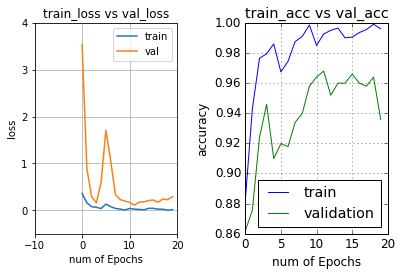

In [17]:
import matplotlib.pyplot as plt
# visualizing losses and accuracy
train_loss=hist.history['loss']
val_loss=hist.history['val_loss']
train_acc = hist.history['accuracy']
val_acc=hist.history['val_accuracy']
xc=range(20)


# plt.figure(1,figsize=(7,5))
plt.subplot(1, 2, 1)
plt.plot(xc,train_loss)
plt.plot(xc,val_loss)
plt.xlabel('num of Epochs')
plt.ylabel('loss')
plt.title('train_loss vs val_loss')
plt.grid(True)
plt.legend(['train','val'])
plt.style.use(['classic'])
plt.rcParams['figure.figsize'] = (9, 6)
# plt.figure(2,figsize=(7,5))
plt.subplot(1, 2, 2)
plt.plot(xc,train_acc)
plt.plot(xc,val_acc)
plt.xlabel('num of Epochs')
plt.ylabel('accuracy')
plt.title('train_acc vs val_acc')
plt.grid(True)
plt.legend(['train','validation'],loc=4)
plt.style.use(['classic'])
plt.tight_layout()
plt.show()

In [19]:
custom_resnet_model2.save('fineTuneResNet101.h5')

In [ ]:
new_model = tf.keras.models.load_model('fineTuneResNet101.h5')

In [ ]:
new_model.summary()